In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

# Read Data

In [2]:
df=pd.read_csv("/Users/raniaali/Downloads/ds_salaries.csv")

In [3]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [4]:
df.shape

(3755, 11)

# Check if there null in data

In [5]:
df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [6]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

# EDA & Visualization

In [7]:
df["remote_ratio"].unique()

array([100,   0,  50])

In [8]:
df['remote_ratio'].unique()

array([100,   0,  50])

In [9]:
df['remote_ratio']=df['remote_ratio'].map({100: 'Fully_Remote', 0:'On_Site', 50:'Partly_remote'})


In [10]:
remot_jobs=df["remote_ratio"].value_counts()
remot_jobs


On_Site          1923
Fully_Remote     1643
Partly_remote     189
Name: remote_ratio, dtype: int64

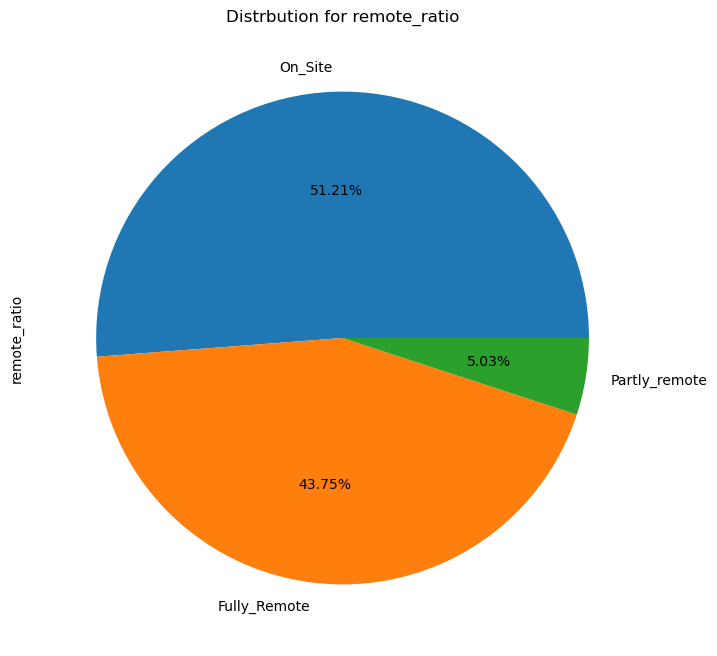

In [11]:
#Distrbution for remote_ratio
remot_jobs.plot(kind='pie', subplots=True, figsize=(8,8),autopct="%.2f%%")
plt.title("Distrbution for remote_ratio");

In [12]:
df["job_title"].unique()

array(['Principal Data Scientist', 'ML Engineer', 'Data Scientist',
       'Applied Scientist', 'Data Analyst', 'Data Modeler',
       'Research Engineer', 'Analytics Engineer',
       'Business Intelligence Engineer', 'Machine Learning Engineer',
       'Data Strategist', 'Data Engineer', 'Computer Vision Engineer',
       'Data Quality Analyst', 'Compliance Data Analyst',
       'Data Architect', 'Applied Machine Learning Engineer',
       'AI Developer', 'Research Scientist', 'Data Analytics Manager',
       'Business Data Analyst', 'Applied Data Scientist',
       'Staff Data Analyst', 'ETL Engineer', 'Data DevOps Engineer',
       'Head of Data', 'Data Science Manager', 'Data Manager',
       'Machine Learning Researcher', 'Big Data Engineer',
       'Data Specialist', 'Lead Data Analyst', 'BI Data Engineer',
       'Director of Data Science', 'Machine Learning Scientist',
       'MLOps Engineer', 'AI Scientist', 'Autonomous Vehicle Technician',
       'Applied Machine Learning Sc

In [13]:
jobs=df['job_title'].value_counts()[:20]
jobs

Data Engineer                 1040
Data Scientist                 840
Data Analyst                   612
Machine Learning Engineer      289
Analytics Engineer             103
Data Architect                 101
Research Scientist              82
Data Science Manager            58
Applied Scientist               58
Research Engineer               37
ML Engineer                     34
Data Manager                    29
Machine Learning Scientist      26
Data Science Consultant         24
Data Analytics Manager          22
Computer Vision Engineer        18
AI Scientist                    16
BI Data Analyst                 15
Business Data Analyst           15
Data Specialist                 14
Name: job_title, dtype: int64

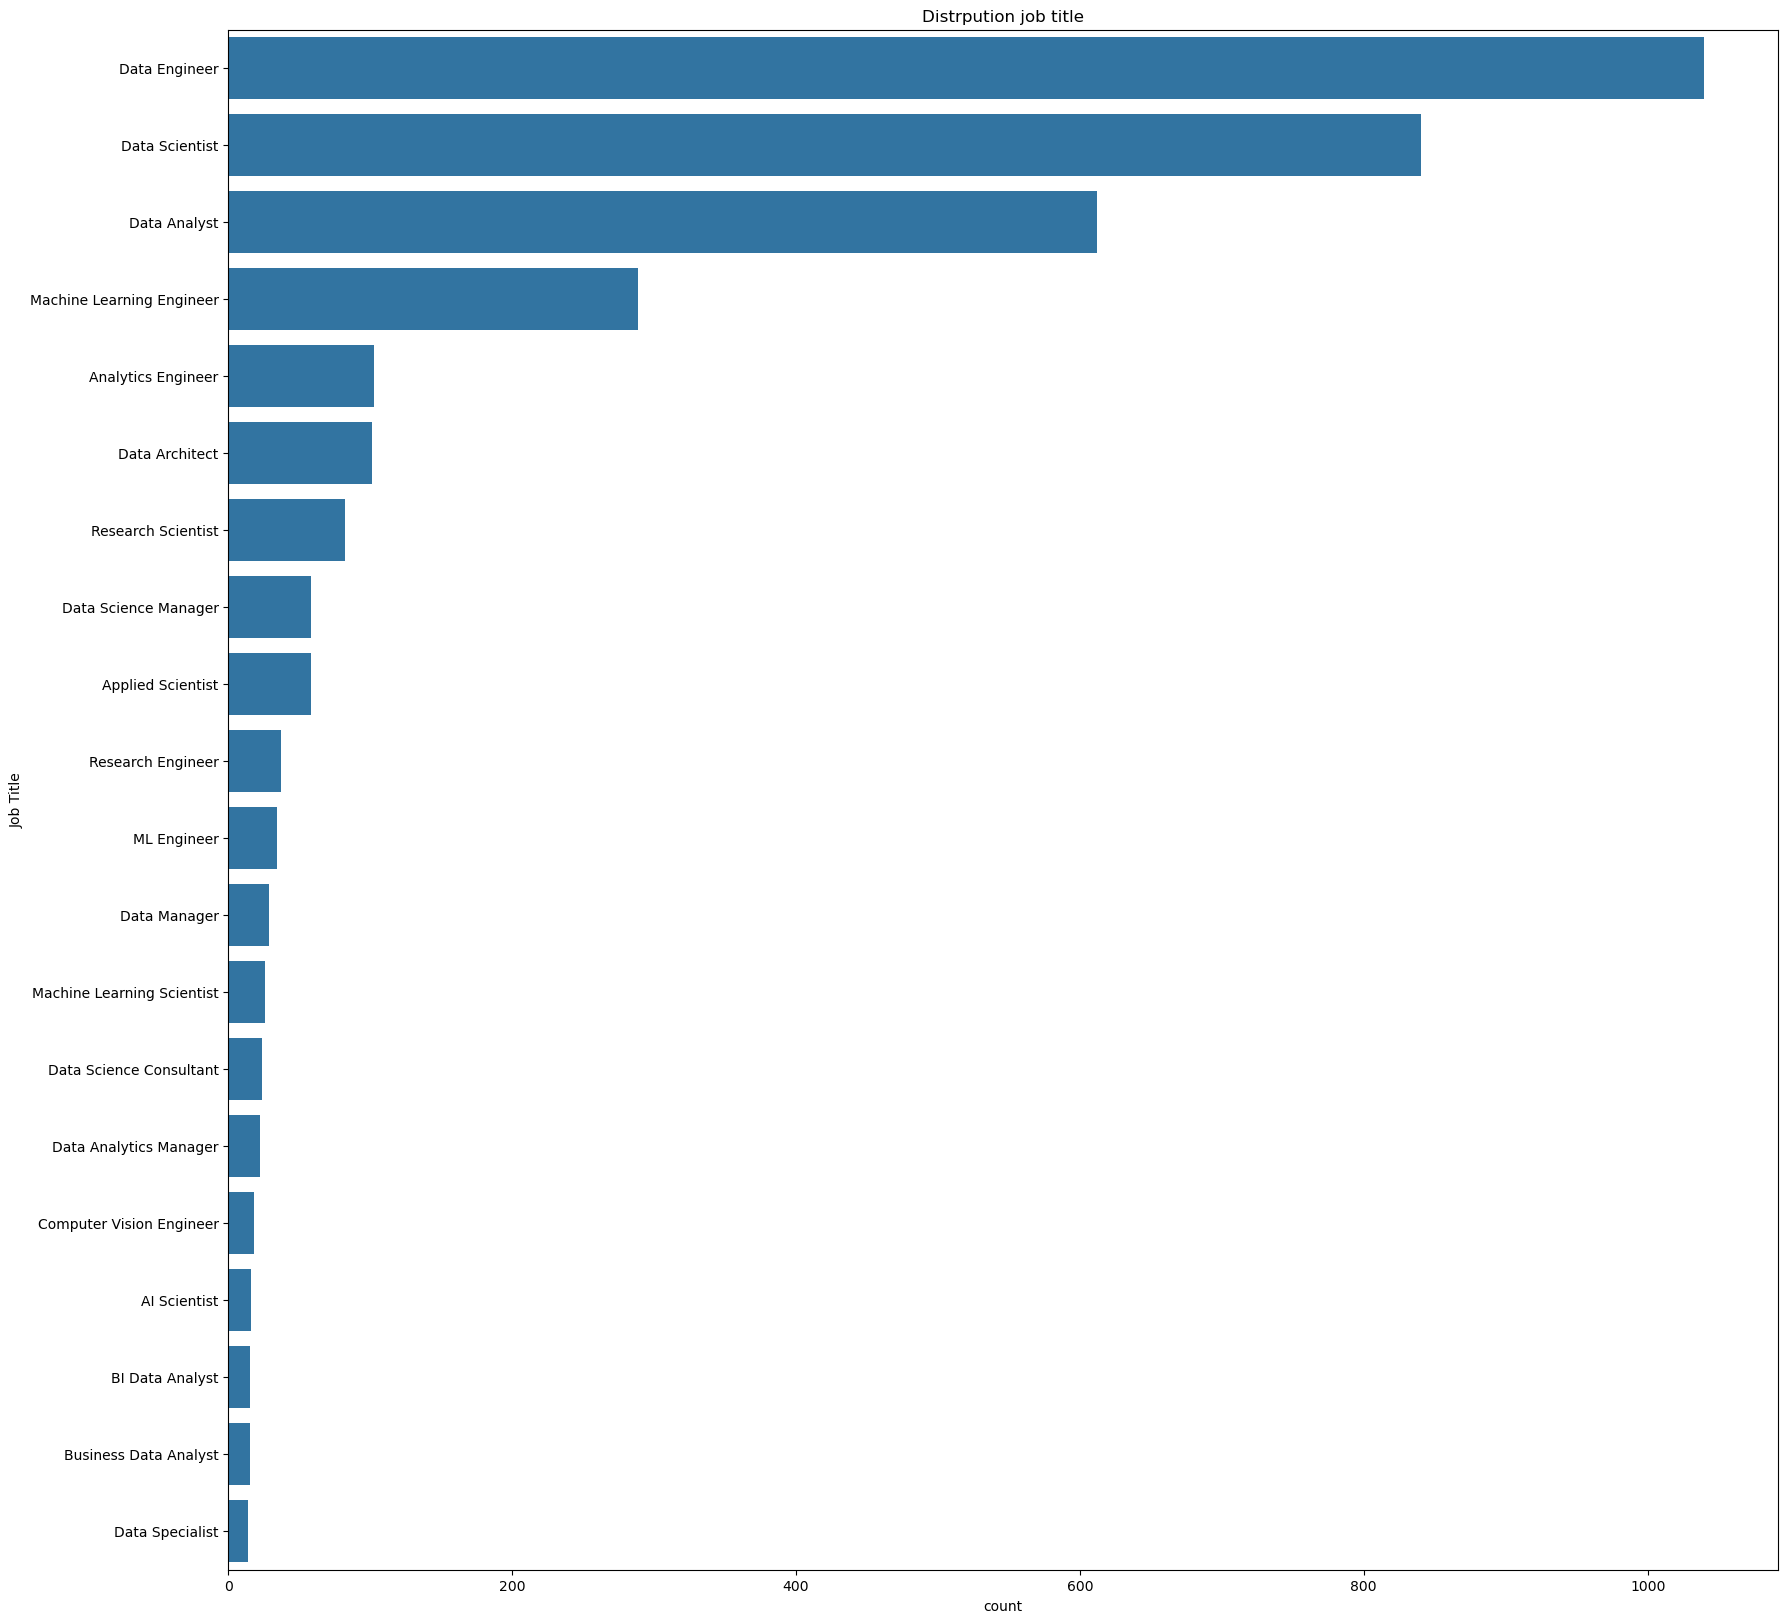

In [14]:
plt.figure(figsize=(20, 20))
sns.barplot(x=jobs.values,y=jobs.index, errorbar=None, order=jobs.index)
plt.title('Distrpution job title')
plt.xlabel('count')
plt.ylabel('Job Title')
plt.show()

In [15]:
df["job_title"].value_counts()

Data Engineer                          1040
Data Scientist                          840
Data Analyst                            612
Machine Learning Engineer               289
Analytics Engineer                      103
                                       ... 
Principal Machine Learning Engineer       1
Azure Data Engineer                       1
Manager Data Management                   1
Marketing Data Engineer                   1
Finance Data Analyst                      1
Name: job_title, Length: 93, dtype: int64

In [16]:
#df['job_category'].value_counts()


In [17]:
# Distribution of job_category
#sns.countplot(x=df['job_category'],data=df)
#plt.title("Distribution of job_category")

In [18]:
df["experience_level"].unique()

array(['SE', 'MI', 'EN', 'EX'], dtype=object)

In [19]:
df['experience_level']=df['experience_level'].map({
    'SE':'Senior',
    'EN':"Entry level",
    'EX':'Executive level',
    'MI':'Mid level'})


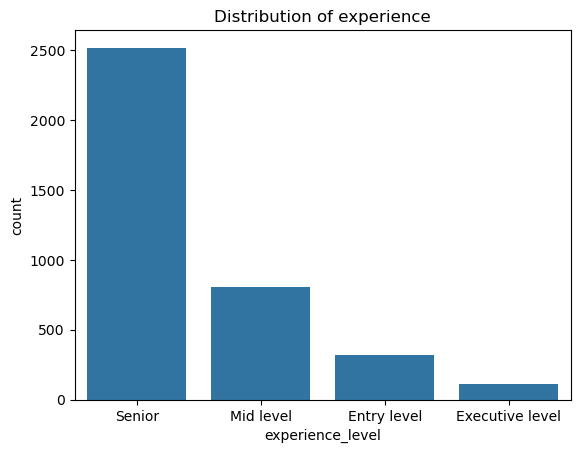

In [20]:
sns.countplot(x=df['experience_level'],data=df)
plt.title("Distribution of experience");

In [21]:
df['employment_type'].unique()

array(['FT', 'CT', 'FL', 'PT'], dtype=object)

In [22]:
df['employment_type'] = df['employment_type'].map({
    'FL': 'Freelancer',
    'CT': 'Contractor',
    'FT' : 'Full-time',
    'PT' : 'Part-time'
})

In [23]:
employment_type=df['employment_type'].value_counts()
employment_type

Full-time     3718
Part-time       17
Contractor      10
Freelancer      10
Name: employment_type, dtype: int64

Text(0.5, 1.0, 'Distribution of employment_type')

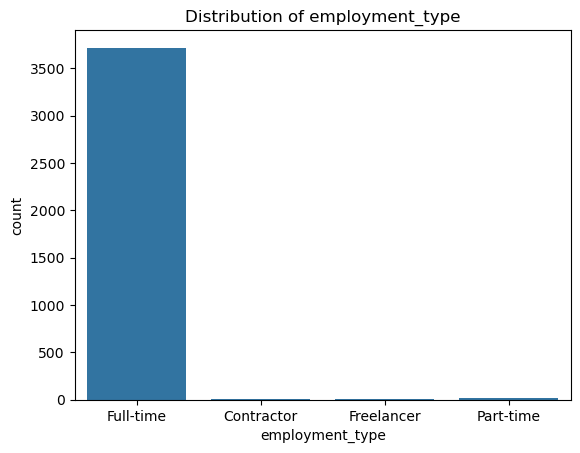

In [24]:
#Distribution of employment_type
sns.countplot(x=df['employment_type'] ,data=df)
plt.title("Distribution of employment_type")

In [25]:
df['company_size'].unique()

array(['L', 'S', 'M'], dtype=object)

In [26]:
df['company_size'] = df['company_size'].map({
    'S': 'SMALL',
    'M': 'MEDIUM',
    'L' : 'LARGE',
})

In [27]:
company_size=df['company_size'].value_counts()
company_size

MEDIUM    3153
LARGE      454
SMALL      148
Name: company_size, dtype: int64

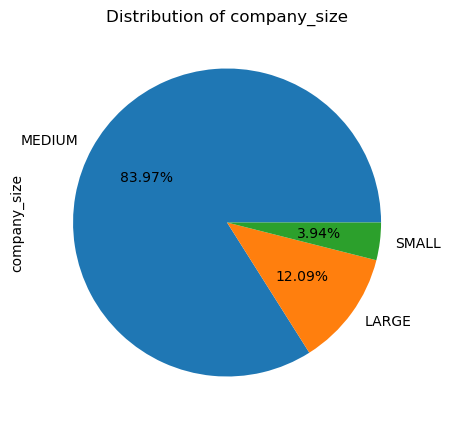

In [28]:
#Distribution of company_size
company_size.plot(kind='pie', subplots=True, figsize=(5, 5),autopct="%.2f%%")
plt.title("Distribution of company_size");

In [29]:
salary_currency=df['salary_currency'].value_counts()[:5]
salary_currency

USD    3224
EUR     236
GBP     161
INR      60
CAD      25
Name: salary_currency, dtype: int64

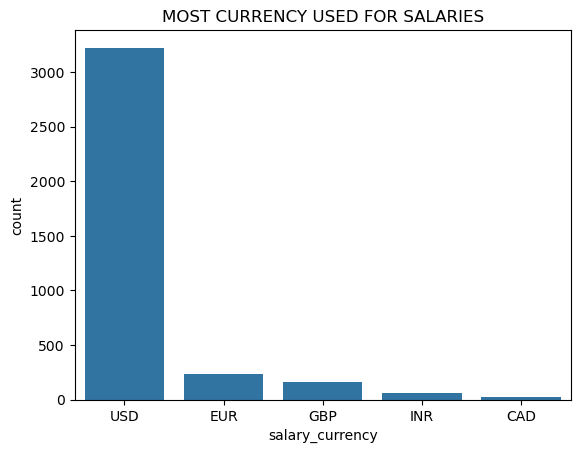

In [30]:
#To get the most salary_currency used
sns.countplot(x='salary_currency',data=df,order=salary_currency.index)
plt.title("MOST CURRENCY USED FOR SALARIES");

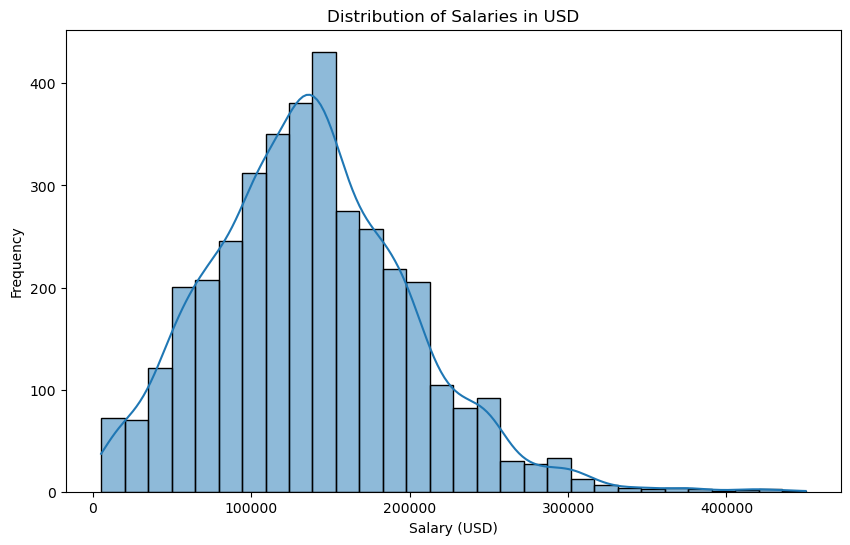

In [31]:
#Distribution of Salaries in USD
plt.figure(figsize=(10, 6))
sns.histplot(df['salary_in_usd'], bins=30, kde=True)
plt.title('Distribution of Salaries in USD')
plt.xlabel('Salary (USD)')
plt.ylabel('Frequency')
plt.show()

In [32]:
df['company_location'].unique()

array(['ES', 'US', 'CA', 'DE', 'GB', 'NG', 'IN', 'HK', 'NL', 'CH', 'CF',
       'FR', 'FI', 'UA', 'IE', 'IL', 'GH', 'CO', 'SG', 'AU', 'SE', 'SI',
       'MX', 'BR', 'PT', 'RU', 'TH', 'HR', 'VN', 'EE', 'AM', 'BA', 'KE',
       'GR', 'MK', 'LV', 'RO', 'PK', 'IT', 'MA', 'PL', 'AL', 'AR', 'LT',
       'AS', 'CR', 'IR', 'BS', 'HU', 'AT', 'SK', 'CZ', 'TR', 'PR', 'DK',
       'BO', 'PH', 'BE', 'ID', 'EG', 'AE', 'LU', 'MY', 'HN', 'JP', 'DZ',
       'IQ', 'CN', 'NZ', 'CL', 'MD', 'MT'], dtype=object)

In [33]:
company_location=df["company_location"].value_counts()[:5]
company_location

US    3040
GB     172
CA      87
ES      77
IN      58
Name: company_location, dtype: int64

Text(0.5, 1.0, 'Distribution of company_location')

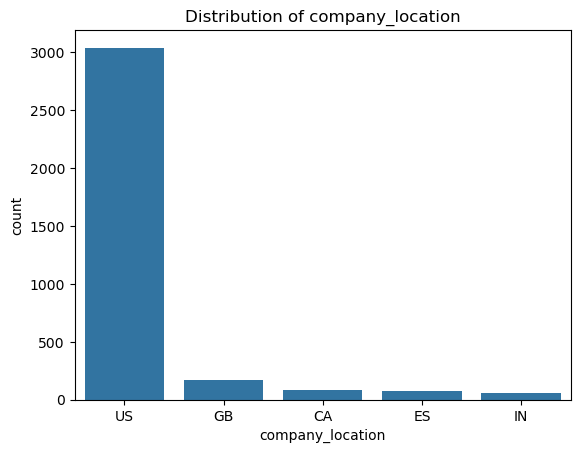

In [34]:
#Distribution of company_location
sns.countplot(x="company_location" ,data=df,order=company_location.index)
plt.title("Distribution of company_location")

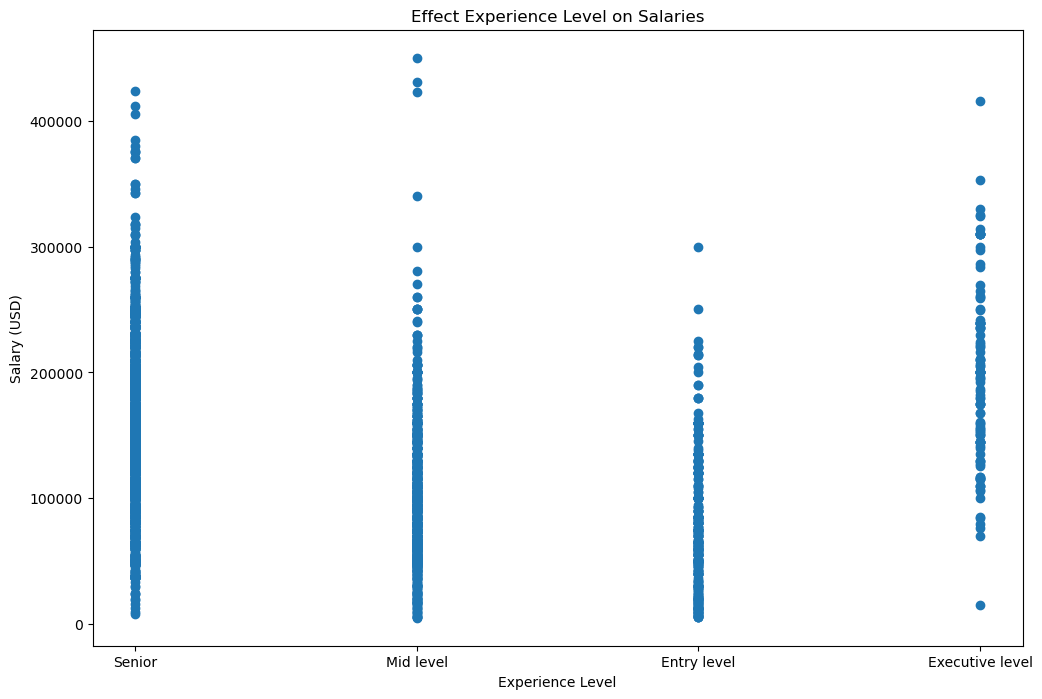

In [35]:
plt.figure(figsize=(12, 8))
plt.scatter(x='experience_level', y='salary_in_usd', data=df)
plt.title('Effect Experience Level on Salaries')
plt.xlabel('Experience Level')
plt.ylabel('Salary (USD)')
plt.show()

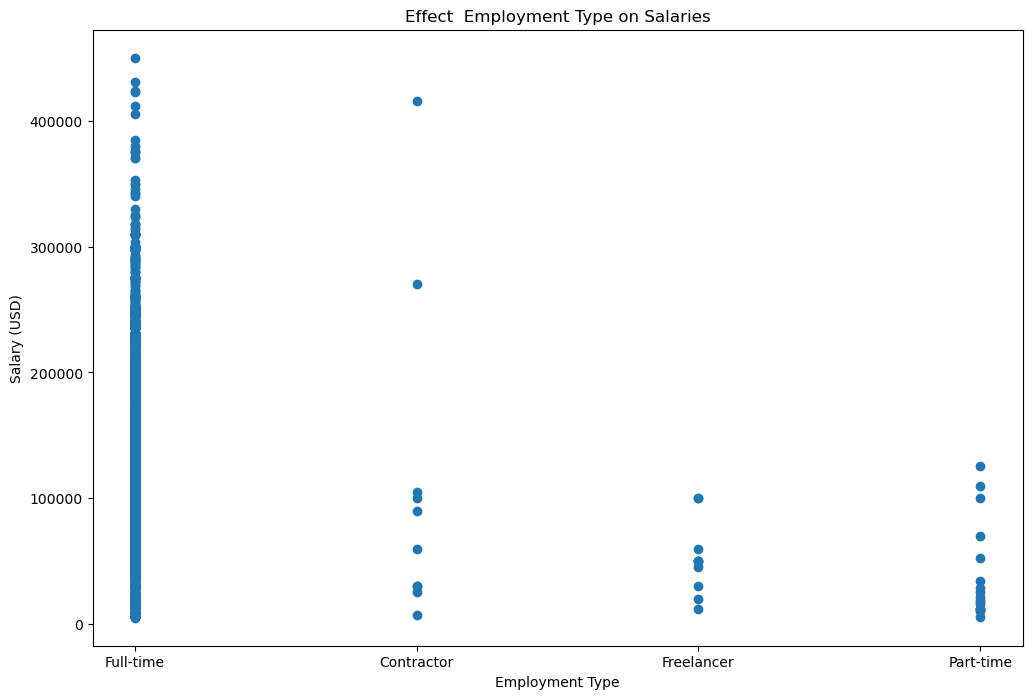

In [36]:
plt.figure(figsize=(12, 8))
plt.scatter(x='employment_type', y='salary_in_usd', data=df)
plt.title('Effect  Employment Type on Salaries')
plt.xlabel('Employment Type')
plt.ylabel('Salary (USD)')
plt.show()

In [37]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,Senior,Full-time,Principal Data Scientist,80000,EUR,85847,ES,Fully_Remote,ES,LARGE
1,2023,Mid level,Contractor,ML Engineer,30000,USD,30000,US,Fully_Remote,US,SMALL
2,2023,Mid level,Contractor,ML Engineer,25500,USD,25500,US,Fully_Remote,US,SMALL
3,2023,Senior,Full-time,Data Scientist,175000,USD,175000,CA,Fully_Remote,CA,MEDIUM
4,2023,Senior,Full-time,Data Scientist,120000,USD,120000,CA,Fully_Remote,CA,MEDIUM


In [38]:
# Identify the top  20 job titles with the highest median salary
top_job_titles = df.groupby('job_title')['salary_in_usd'].median().nlargest(20).index
top_job_titles

Index(['Data Science Tech Lead', 'Cloud Data Architect', 'Data Lead',
       'Data Analytics Lead', 'Head of Data', 'Principal Data Engineer',
       'Applied Scientist', 'Principal Machine Learning Engineer',
       'Data Science Manager', 'Data Infrastructure Engineer',
       'Machine Learning Software Engineer', 'Computer Vision Engineer',
       'Machine Learning Infrastructure Engineer',
       'Business Intelligence Engineer', 'Director of Data Science',
       'Machine Learning Scientist', 'Principal Data Scientist',
       'Data Science Lead', 'Head of Data Science', 'Cloud Database Engineer'],
      dtype='object', name='job_title')

In [39]:
# Filter the dataset for the top job titles
df_top_jobs = df[df['job_title'].isin(top_job_titles)]
df_top_jobs

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,Senior,Full-time,Principal Data Scientist,80000,EUR,85847,ES,Fully_Remote,ES,LARGE
5,2023,Senior,Full-time,Applied Scientist,222200,USD,222200,US,On_Site,US,LARGE
6,2023,Senior,Full-time,Applied Scientist,136000,USD,136000,US,On_Site,US,LARGE
13,2023,Entry level,Full-time,Applied Scientist,213660,USD,213660,US,On_Site,US,LARGE
14,2023,Entry level,Full-time,Applied Scientist,130760,USD,130760,US,On_Site,US,LARGE
...,...,...,...,...,...,...,...,...,...,...,...
3733,2021,Senior,Full-time,Principal Data Scientist,235000,USD,235000,US,Fully_Remote,US,LARGE
3740,2020,Senior,Full-time,Data Science Manager,190200,USD,190200,US,Fully_Remote,US,MEDIUM
3745,2021,Senior,Full-time,Director of Data Science,168000,USD,168000,JP,On_Site,JP,SMALL
3751,2021,Mid level,Full-time,Principal Data Scientist,151000,USD,151000,US,Fully_Remote,US,LARGE


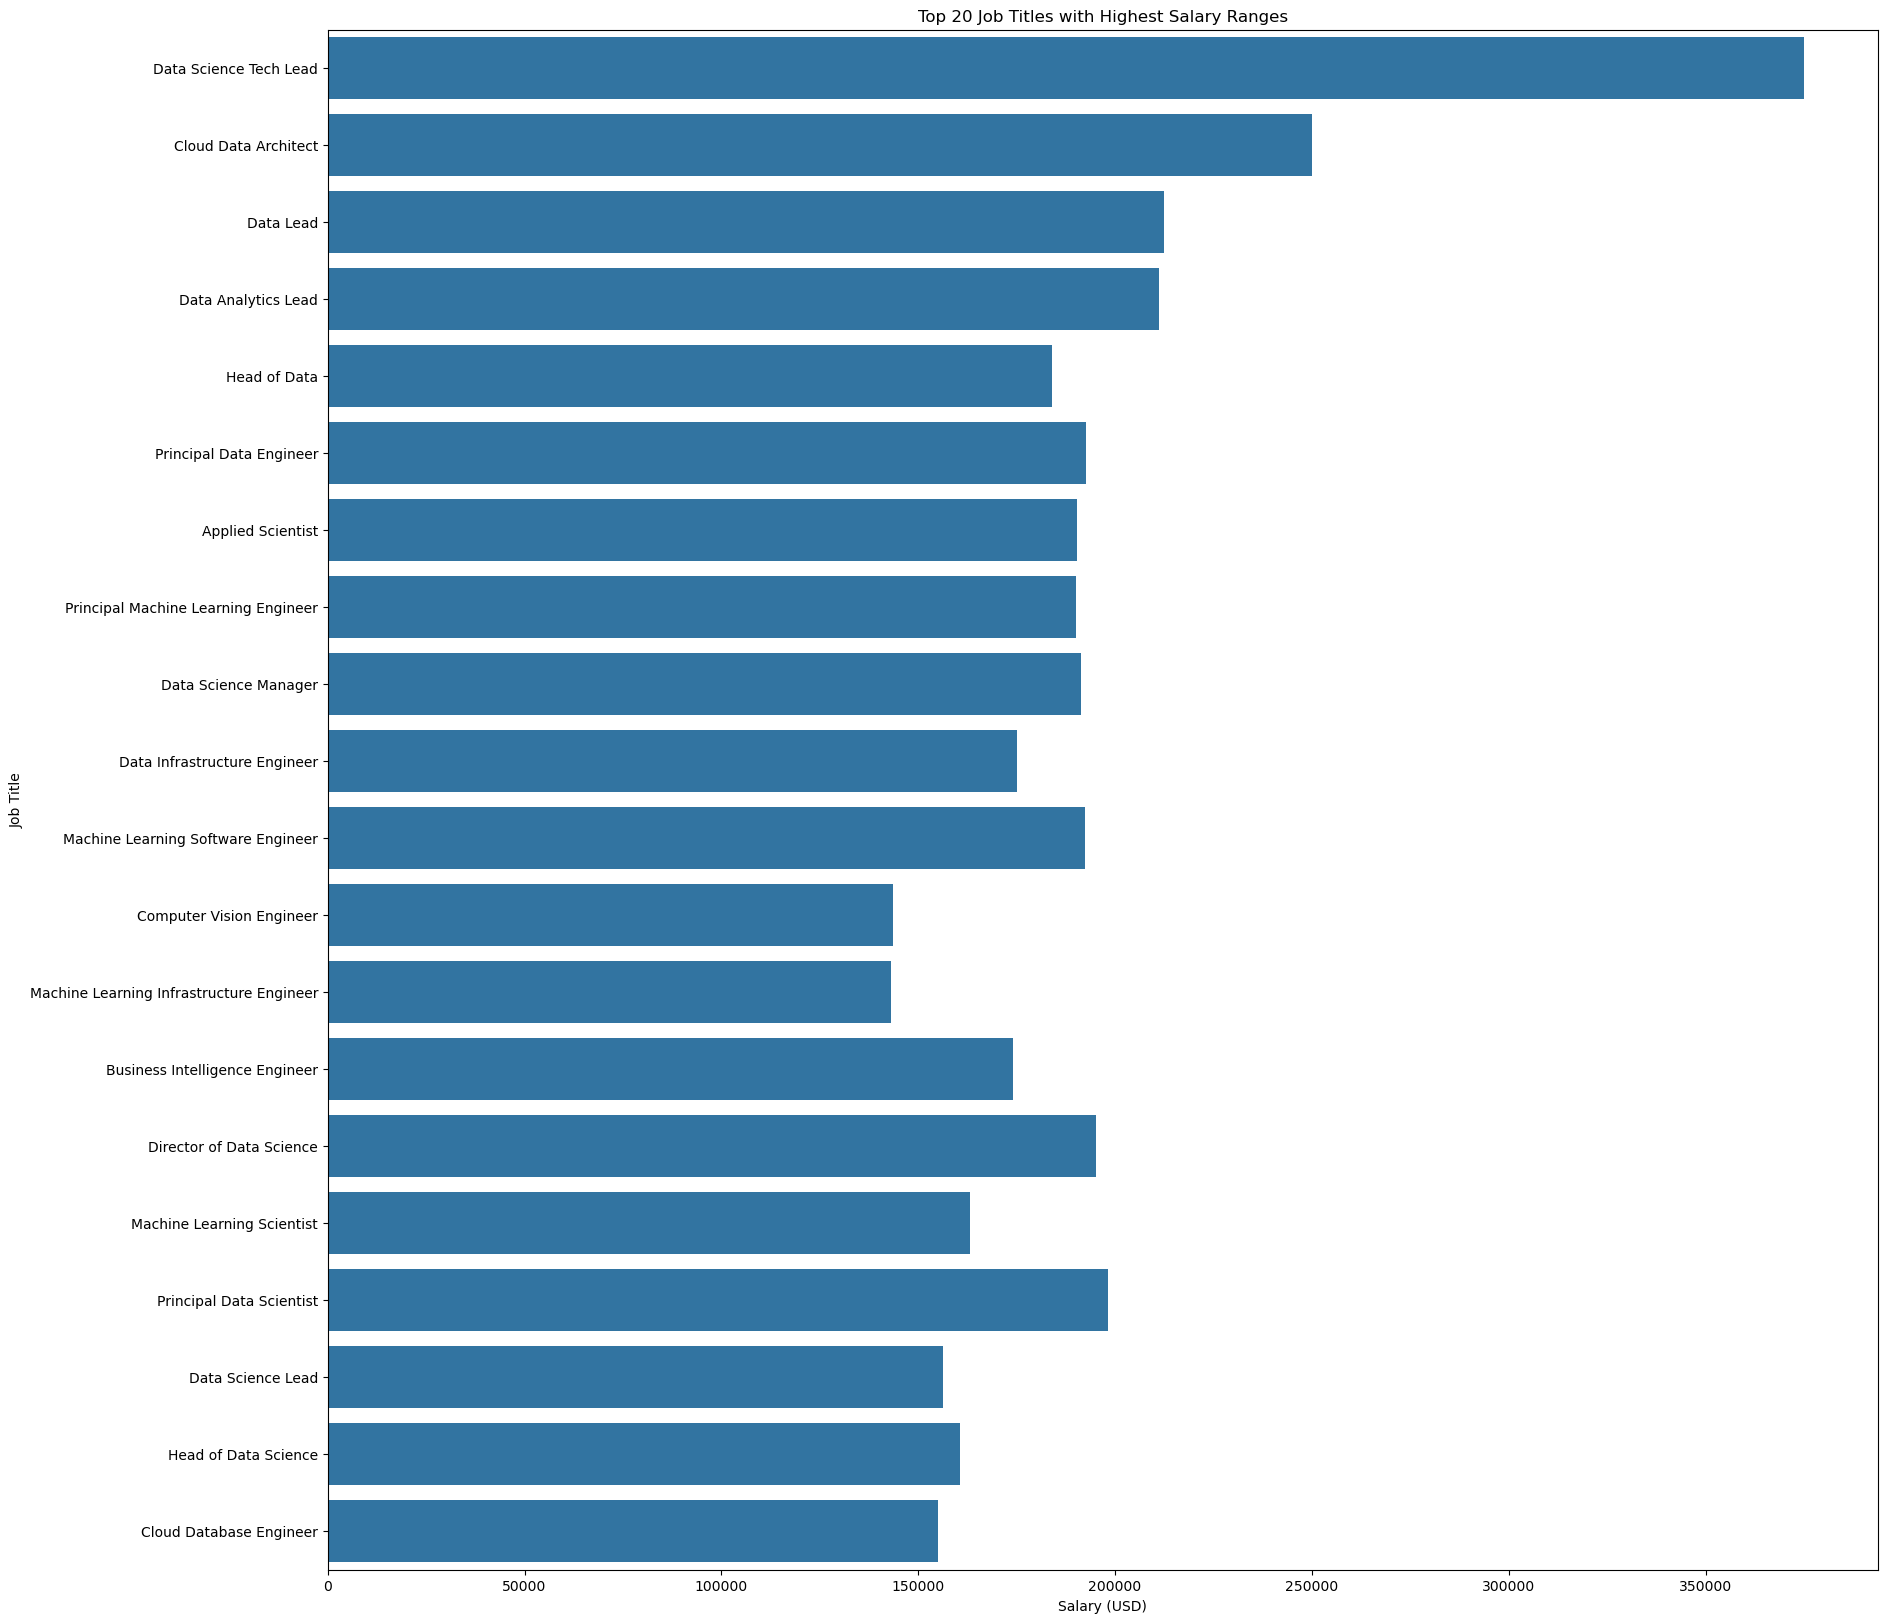

In [40]:
# Create a bar chart to show the highest-paying 20 job titles 
plt.figure(figsize=(20, 20))
sns.barplot(x='salary_in_usd', y='job_title', data=df_top_jobs, errorbar=None, order=top_job_titles)
plt.title('Top 20 Job Titles with Highest Salary Ranges')
plt.xlabel('Salary (USD)')
plt.ylabel('Job Title')
plt.show()

In [41]:
# Identify the top 10  job titles with the highest median salary
top_job_titles = df.groupby('job_title')['salary_in_usd'].median().nlargest(10).index


In [42]:
# Filter the dataset for the top job titles
df_top_jobs = df[df['job_title'].isin(top_job_titles)]

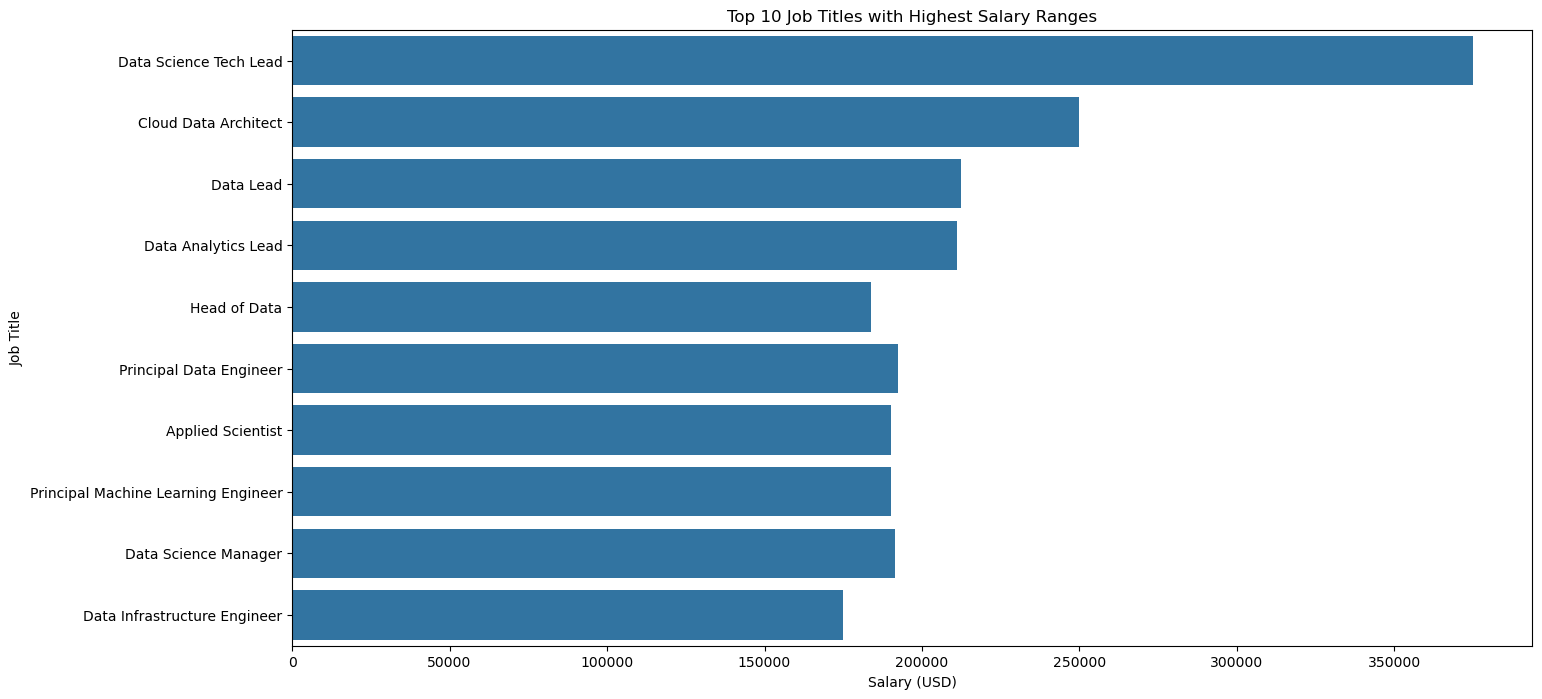

In [43]:
# Create a bar chart to show the highest-paying job titles and their distribution
plt.figure(figsize=(16, 8))
sns.barplot(x='salary_in_usd', y='job_title', data=df_top_jobs, errorbar=None, order=top_job_titles)
plt.title('Top 10 Job Titles with Highest Salary Ranges')
plt.xlabel('Salary (USD)')
plt.ylabel('Job Title')
plt.show()


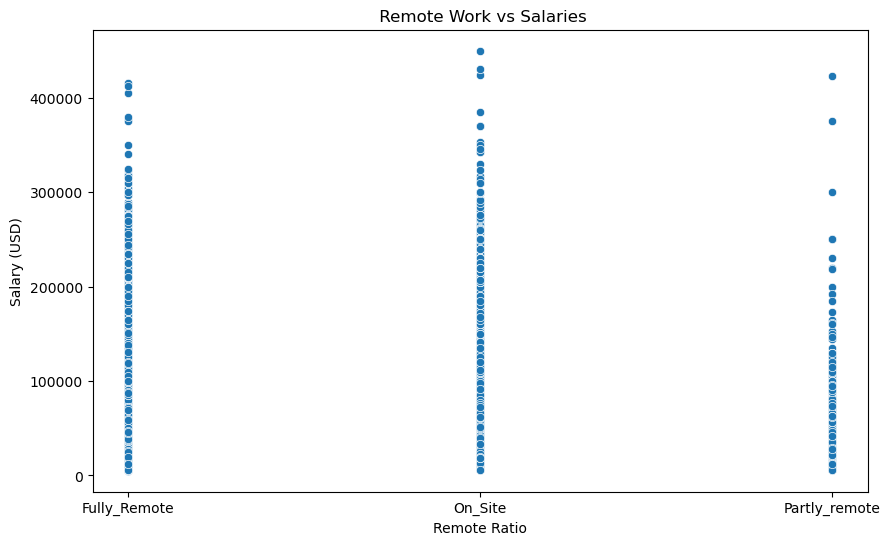

In [44]:
# Explore the effect of remote work on salaries
plt.figure(figsize=(10, 6))
sns.scatterplot(x='remote_ratio', y='salary_in_usd', data=df)
plt.title(' Remote Work vs Salaries')
plt.xlabel('Remote Ratio')
plt.ylabel('Salary (USD)')
plt.show()

<AxesSubplot:xlabel='company_location', ylabel='salary_in_usd'>

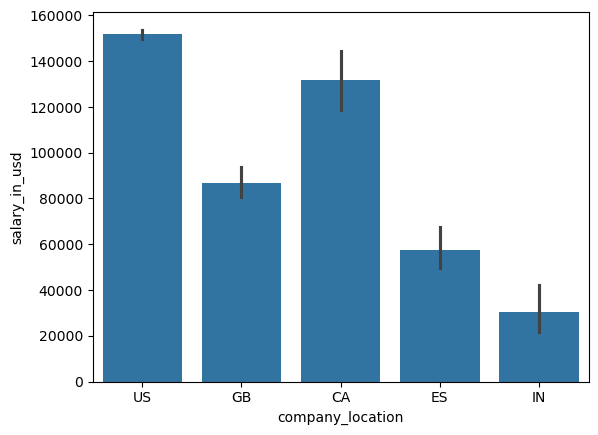

In [45]:
order_=df['company_location'].value_counts().head().index
sns.barplot(x='company_location',y='salary_in_usd',data=df,order=order_)
#salary depends on loaction and how developed that country is

<AxesSubplot:xlabel='work_year', ylabel='count'>

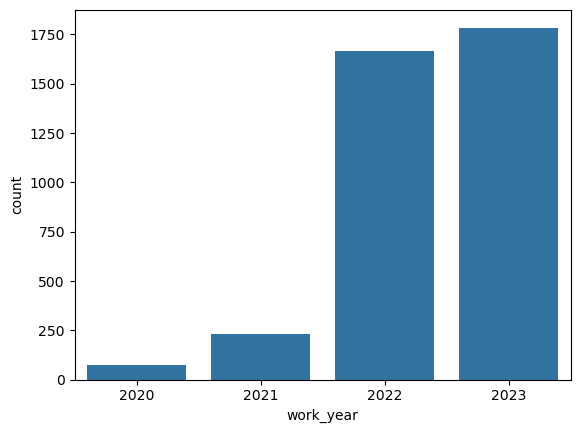

In [46]:
sns.countplot(x='work_year',data=df)

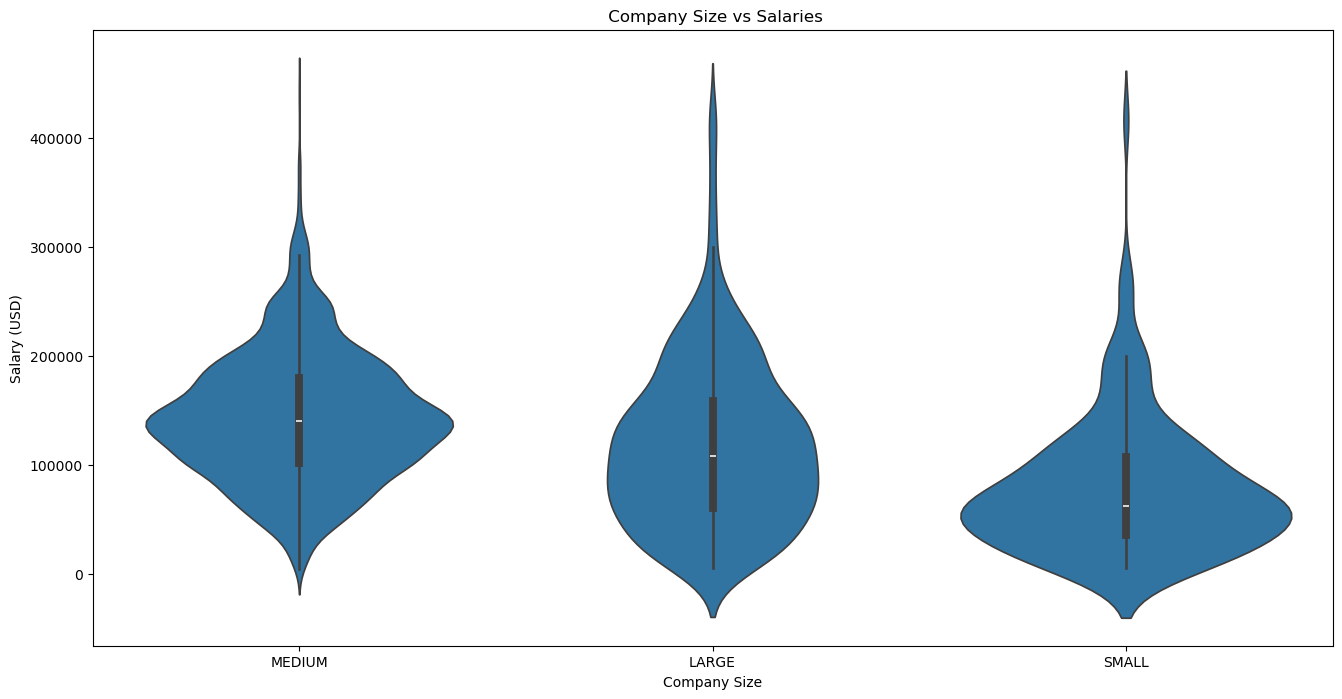

In [47]:
# Explore the effect of company size on salaries using violin plots
plt.figure(figsize=(16, 8))
sns.violinplot(x='company_size', y='salary_in_usd', data=df, order=company_size.index)
plt.title(' Company Size vs Salaries')
plt.xlabel('Company Size')
plt.ylabel('Salary (USD)')
plt.show()

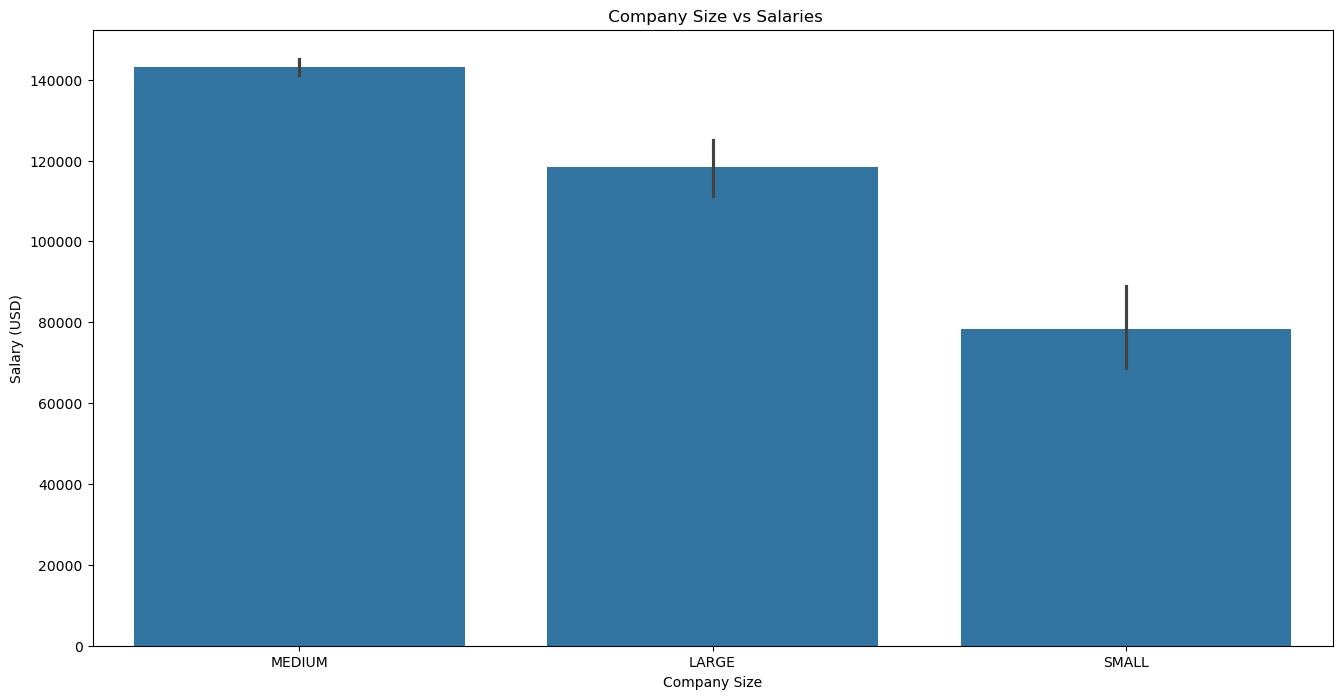

In [48]:
plt.figure(figsize=(16, 8))
sns.barplot(x='company_size', y='salary_in_usd', data=df, order=company_size.index)
plt.title(' Company Size vs Salaries')
plt.xlabel('Company Size')
plt.ylabel('Salary (USD)')
plt.show()

# Final EDA For Modeling

In [49]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,Senior,Full-time,Principal Data Scientist,80000,EUR,85847,ES,Fully_Remote,ES,LARGE
1,2023,Mid level,Contractor,ML Engineer,30000,USD,30000,US,Fully_Remote,US,SMALL
2,2023,Mid level,Contractor,ML Engineer,25500,USD,25500,US,Fully_Remote,US,SMALL
3,2023,Senior,Full-time,Data Scientist,175000,USD,175000,CA,Fully_Remote,CA,MEDIUM
4,2023,Senior,Full-time,Data Scientist,120000,USD,120000,CA,Fully_Remote,CA,MEDIUM


In [50]:
df["experience_level"].unique()

array(['Senior', 'Mid level', 'Entry level', 'Executive level'],
      dtype=object)

In [51]:
experience={"Entry level":0,"Mid level":1,"Senior":2,"Executive level":3}

In [52]:
df["experience_level"]=df["experience_level"].map(experience)

In [53]:
df["experience_level"].unique()

array([2, 1, 0, 3])

In [54]:
df["company_size"].unique()

array(['LARGE', 'SMALL', 'MEDIUM'], dtype=object)

In [55]:
size={"SMALL":0,"MEDIUM":1,"LARGE":2}

In [56]:
df["company_size"]=df["company_size"].map(size)

In [57]:
df["company_size"].unique()

array([2, 0, 1])

In [58]:
df["employment_type"].unique()

array(['Full-time', 'Contractor', 'Freelancer', 'Part-time'], dtype=object)

In [59]:
type_={"Freelancer":0,"Contractor":1,"Part-time":2,"Full-time":3}

In [60]:
df["employment_type"]=df["employment_type"].map(type_)

In [61]:
df["employment_type"].unique()

array([3, 1, 0, 2])

In [62]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,2,3,Principal Data Scientist,80000,EUR,85847,ES,Fully_Remote,ES,2
1,2023,1,1,ML Engineer,30000,USD,30000,US,Fully_Remote,US,0
2,2023,1,1,ML Engineer,25500,USD,25500,US,Fully_Remote,US,0
3,2023,2,3,Data Scientist,175000,USD,175000,CA,Fully_Remote,CA,1
4,2023,2,3,Data Scientist,120000,USD,120000,CA,Fully_Remote,CA,1


<AxesSubplot:>

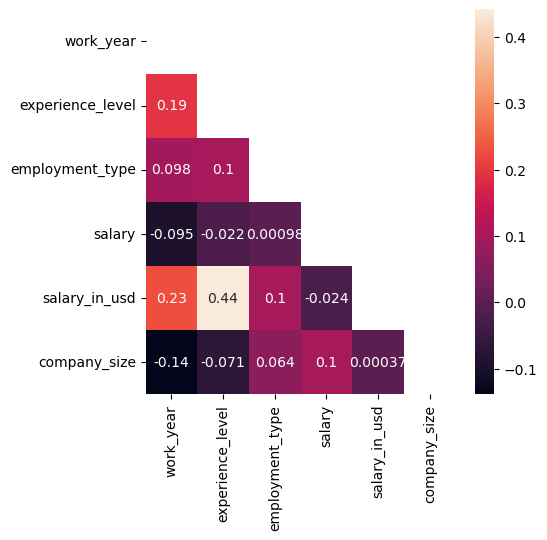

In [63]:
c = df.corr()
np.zeros_like(c)
mask = np.zeros_like(c)
triangle_indicies = np.triu_indices_from(mask)
mask[triangle_indicies] = True
plt.figure(figsize=(5,5))
sns.heatmap(c, mask=mask, annot=True)

In [64]:
df.drop(columns=["salary","salary_currency","employee_residence"],axis=1,inplace=True)

In [65]:
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_location,company_size
0,2023,2,3,Principal Data Scientist,85847,Fully_Remote,ES,2
1,2023,1,1,ML Engineer,30000,Fully_Remote,US,0
2,2023,1,1,ML Engineer,25500,Fully_Remote,US,0
3,2023,2,3,Data Scientist,175000,Fully_Remote,CA,1
4,2023,2,3,Data Scientist,120000,Fully_Remote,CA,1


In [66]:
df["remote_ratio"].unique()

array(['Fully_Remote', 'On_Site', 'Partly_remote'], dtype=object)

In [67]:
dummies_col=['company_location','job_title','remote_ratio']
d= pd.get_dummies(df[dummies_col],columns=dummies_col,drop_first=True)

In [68]:
d.head()

,company_location_AL,company_location_AM,company_location_AR,company_location_AS,company_location_AT,company_location_AU,company_location_BA,company_location_BE,company_location_BO,company_location_BR,...,job_title_Principal Machine Learning Engineer,job_title_Product Data Analyst,job_title_Product Data Scientist,job_title_Research Engineer,job_title_Research Scientist,job_title_Software Data Engineer,job_title_Staff Data Analyst,job_title_Staff Data Scientist,remote_ratio_On_Site,remote_ratio_Partly_remote
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
df.shape

(3755, 8)

In [70]:
df=pd.concat([df,d],axis=1)
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_location,company_size,company_location_AL,company_location_AM,...,job_title_Principal Machine Learning Engineer,job_title_Product Data Analyst,job_title_Product Data Scientist,job_title_Research Engineer,job_title_Research Scientist,job_title_Software Data Engineer,job_title_Staff Data Analyst,job_title_Staff Data Scientist,remote_ratio_On_Site,remote_ratio_Partly_remote
0,2023,2,3,Principal Data Scientist,85847,Fully_Remote,ES,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2023,1,1,ML Engineer,30000,Fully_Remote,US,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2023,1,1,ML Engineer,25500,Fully_Remote,US,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2023,2,3,Data Scientist,175000,Fully_Remote,CA,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2023,2,3,Data Scientist,120000,Fully_Remote,CA,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
df.shape

(3755, 173)

In [72]:
df.drop(columns=["remote_ratio","company_location","job_title","work_year"],axis=1,inplace=True)

In [73]:
df['salary_in_usd'].describe()

count      3755.000000
mean     137570.389880
std       63055.625278
min        5132.000000
25%       95000.000000
50%      135000.000000
75%      175000.000000
max      450000.000000
Name: salary_in_usd, dtype: float64

In [74]:
def categorize_salary(salary):
    if salary >= 250000:
        return 4
    elif salary >= 150000:
        return 3
    elif salary >= 50000:
        return 2
    elif salary >= 5000 :
        return 1
    else:
        return 0
df['salary_in_usd']=df['salary_in_usd'].apply(categorize_salary)


In [75]:
df['salary_in_usd'].value_counts()

2    1990
3    1316
1     264
4     185
Name: salary_in_usd, dtype: int64

In [76]:
df.head()

,experience_level,employment_type,salary_in_usd,company_size,company_location_AL,company_location_AM,company_location_AR,company_location_AS,company_location_AT,company_location_AU,...,job_title_Principal Machine Learning Engineer,job_title_Product Data Analyst,job_title_Product Data Scientist,job_title_Research Engineer,job_title_Research Scientist,job_title_Software Data Engineer,job_title_Staff Data Analyst,job_title_Staff Data Scientist,remote_ratio_On_Site,remote_ratio_Partly_remote
0,2,3,2,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,3,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,3,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
X=df.drop("salary_in_usd",axis=1)
y=df["salary_in_usd"] 

In [78]:
train_test_split(X,y)
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8)

In [79]:
y.value_counts()

2    1990
3    1316
1     264
4     185
Name: salary_in_usd, dtype: int64

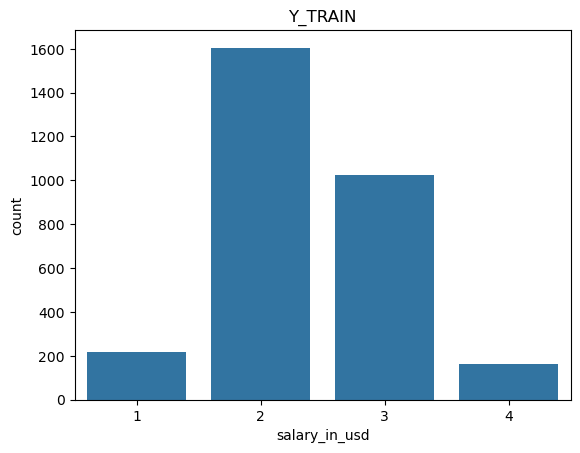

In [80]:
sns.countplot(x=y_train)
plt.title("Y_TRAIN");

In [81]:
#model=LinearRegression()
#model.fit(X_train,y_train)

In [82]:
#model.score(X_test,y_test)

In [83]:
model=LogisticRegression()
model.fit(X_train,y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [84]:
model.score(X_test,y_test)

0.625832223701731

In [85]:
predicted=model.predict(X_test)
cm=confusion_matrix(y_test,predicted)
cm

array([[ 28,  19,   0,   0],
       [ 16, 276,  92,   1],
       [  1, 127, 166,   0],
       [  0,  11,  14,   0]])

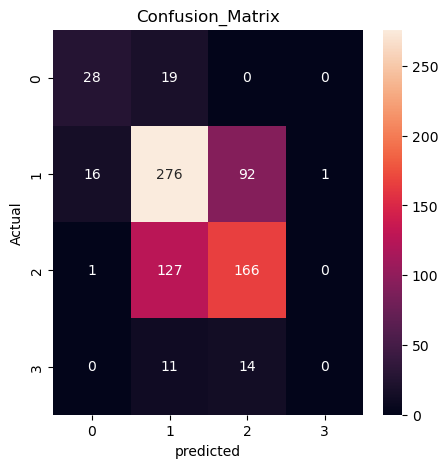

In [86]:
plt.figure(figsize=(5,5))
sns.heatmap(cm,annot=True,fmt="g")
plt.xlabel("predicted")
plt.ylabel("Actual")
plt.title("Confusion_Matrix");